# Sarcasm is the witty and satirical context wherein people use positive words in order to convey a negative message and vice versa. Identifying Sarcasm is difficult for humans. In this notebook, we have taken a text and identified if it is sarcastic or not.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [2]:
import pandas as pd

datastore = pd.read_json('/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json', lines = True)

sentences = datastore['headline'].tolist()
labels = datastore['is_sarcastic'].tolist()
urls = datastore['article_link'].tolist()

#shuffle data to split into train, test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, train_size = 0.8, random_state = 42, shuffle = True)

In [3]:
datastore.shape
train_dataframe = datastore[0:22895]
test_dataframe = datastore[22895:28619]

In [4]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

22895
22895
5724
5724


In [5]:
#tokenize text
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 100
training_size = 20000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [6]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
716/716 - 3s - loss: 0.6299 - accuracy: 0.6602 - val_loss: 0.4795 - val_accuracy: 0.7982
Epoch 2/30
716/716 - 2s - loss: 0.3717 - accuracy: 0.8453 - val_loss: 0.3631 - val_accuracy: 0.8365
Epoch 3/30
716/716 - 2s - loss: 0.2910 - accuracy: 0.8826 - val_loss: 0.3538 - val_accuracy: 0.8384
Epoch 4/30
716/716 - 2s - loss: 0.2451 - accuracy: 0.9022 - val_loss: 0.3351 - val_accuracy: 0.8527
Epoch 5/30
716/716 - 2s - loss: 0.2144 - accuracy: 0.9160 - val_loss: 0.3541 - val_accuracy: 0.8491
Epoch 6/30
716/716 - 2s - loss: 0.1897 - accuracy: 0.9259 - val_loss: 0.3566 - val_accuracy: 0.8463
Epoch 7/30
716/716 - 2s - loss: 0.1724 - accuracy: 0.9342 - val_loss: 0.3549 - val_accuracy: 0.8522
Epoch 8/30
716/716 - 2s - loss: 0.1543 - accuracy: 0.9433 - val_loss: 0.3766 - val_accuracy: 0.8513
Epoch 9/30
716/716 - 2s - loss: 0.1420 - accuracy: 0.9471 - val_loss: 0.4038 - val_accuracy: 0.8443
Epoch 10/30
716/716 - 2s - loss: 0.1297 - accuracy: 0.9531 - val_loss: 0.4144 - val_accuracy: 0.8480

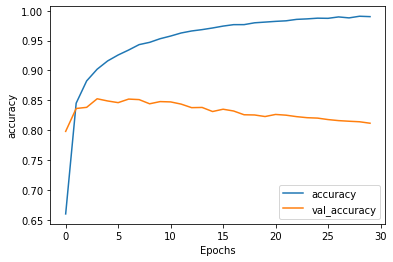

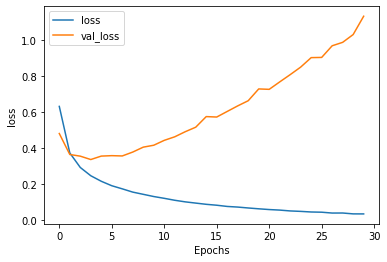

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [8]:
#CNN Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model1.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
716/716 - 6s - loss: 0.4890 - accuracy: 0.7447 - val_loss: 0.3771 - val_accuracy: 0.8251
Epoch 2/30
716/716 - 5s - loss: 0.2758 - accuracy: 0.8858 - val_loss: 0.3509 - val_accuracy: 0.8417
Epoch 3/30
716/716 - 5s - loss: 0.2042 - accuracy: 0.9208 - val_loss: 0.3623 - val_accuracy: 0.8468
Epoch 4/30
716/716 - 5s - loss: 0.1582 - accuracy: 0.9404 - val_loss: 0.4058 - val_accuracy: 0.8438
Epoch 5/30
716/716 - 6s - loss: 0.1217 - accuracy: 0.9561 - val_loss: 0.4554 - val_accuracy: 0.8417
Epoch 6/30
716/716 - 6s - loss: 0.0889 - accuracy: 0.9703 - val_loss: 0.5021 - val_accuracy: 0.8428
Epoch 7/30
716/716 - 6s - loss: 0.0584 - accuracy: 0.9819 - val_loss: 0.6178 - val_accuracy: 0.8375
Epoch 8/30
716/716 - 6s - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.7238 - val_accuracy: 0.8405
Epoch 9/30
716/716 - 6s - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.7999 - val_accuracy: 0.8342
Epoch 10/30
716/716 - 7s - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.9110 - val_accuracy: 0.8295

In [9]:
#LSTM model
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
716/716 - 38s - loss: 0.4118 - accuracy: 0.8017 - val_loss: 0.3215 - val_accuracy: 0.8567
Epoch 2/30
716/716 - 34s - loss: 0.2221 - accuracy: 0.9094 - val_loss: 0.3127 - val_accuracy: 0.8599
Epoch 3/30
716/716 - 34s - loss: 0.1453 - accuracy: 0.9441 - val_loss: 0.3592 - val_accuracy: 0.8578
Epoch 4/30
716/716 - 34s - loss: 0.0929 - accuracy: 0.9669 - val_loss: 0.4582 - val_accuracy: 0.8505
Epoch 5/30
716/716 - 34s - loss: 0.0594 - accuracy: 0.9801 - val_loss: 0.5585 - val_accuracy: 0.8501
Epoch 6/30
716/716 - 35s - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.6654 - val_accuracy: 0.8398
Epoch 7/30
716/716 - 35s - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.8300 - val_accuracy: 0.8435
Epoch 8/30
716/716 - 35s - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.7594 - val_accuracy: 0.8403
Epoch 9/30
716/716 - 35s - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.8977 - val_accuracy: 0.8384
Epoch 10/30
716/716 - 34s - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.8934 - val_accura

In [10]:
#RNN Model
# encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=vocab_size)
# encoder.adapt((datastore['headline']).map(lambda text, label: text))
model3 = tf.keras.Sequential([
    #encoder,
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history3 = model3.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), verbose=2, validation_steps=30)

Epoch 1/10
716/716 - 171s - loss: 0.5618 - accuracy: 0.6535 - val_loss: 0.4219 - val_accuracy: 0.7776
Epoch 2/10
716/716 - 116s - loss: 0.3471 - accuracy: 0.8408 - val_loss: 0.3657 - val_accuracy: 0.8367
Epoch 3/10
716/716 - 114s - loss: 0.2645 - accuracy: 0.8919 - val_loss: 0.3512 - val_accuracy: 0.8438
Epoch 4/10
716/716 - 112s - loss: 0.2119 - accuracy: 0.9198 - val_loss: 0.3503 - val_accuracy: 0.8517
Epoch 5/10
716/716 - 112s - loss: 0.1769 - accuracy: 0.9362 - val_loss: 0.3855 - val_accuracy: 0.8489
Epoch 6/10
716/716 - 113s - loss: 0.1468 - accuracy: 0.9496 - val_loss: 0.4215 - val_accuracy: 0.8494
Epoch 7/10
716/716 - 112s - loss: 0.1226 - accuracy: 0.9606 - val_loss: 0.4581 - val_accuracy: 0.8461
Epoch 8/10
716/716 - 111s - loss: 0.1038 - accuracy: 0.9679 - val_loss: 0.4968 - val_accuracy: 0.8492
Epoch 9/10
716/716 - 112s - loss: 0.0911 - accuracy: 0.9722 - val_loss: 0.5562 - val_accuracy: 0.8459
Epoch 10/10
716/716 - 113s - loss: 0.0776 - accuracy: 0.9765 - val_loss: 0.6099 - 

In [17]:
#plotting comparison between 3 models
import pandas as pd
from pandas import DataFrame
accuracy = [max(history1.history['val_accuracy']),max(history2.history['val_accuracy']), max(history3.history['val_accuracy'])]
loss = [max(history1.history['val_loss']),max(history2.history['val_loss']),max(history3.history['val_loss'])]

col={'Accuracy':accuracy,'Loss':loss}
models=['NN','CNN','LSTM']
graph_df=DataFrame(data=col,index=models)
graph_df

,Accuracy,Loss
NN,0.846785,2.053419
CNN,0.859888,1.651209
LSTM,0.851677,0.609942


<AxesSubplot:>

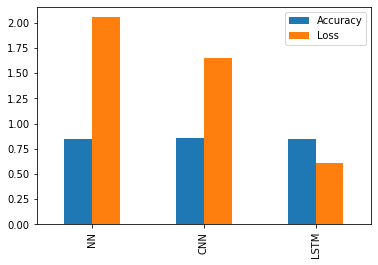

In [18]:
graph_df.plot(kind='bar')